## 🌅🌇 Month Prediction from Sunrise/Sunset Data

Given *data about daily sunrise and sunset in Toronto*, let's try to predict the **month** of a given record.

We will use a logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/kapastor/sundown-and-sunset-data-20102020

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('Sunup_Sundown_Data.csv')
data

,City,Date,Sunup,Sundown
0,toronto,01-01-10,7.0:51,16.0:51
1,toronto,01-02-10,7.0:51,16.0:52
2,toronto,01-03-10,7.0:51,16.0:53
3,toronto,01-04-10,7.0:51,16.0:54
4,toronto,01-05-10,7.0:51,16.0:55
...,...,...,...,...
4013,toronto,12-27-20,7.0000000,16.0:47
4014,toronto,12-28-20,7.0000000,16.0:48
4015,toronto,12-29-20,7.0000000,16.0:49
4016,toronto,12-30-20,7.0000000,16.0:49


### Preprocessing

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     4018 non-null   object
 1   Date     4018 non-null   object
 2   Sunup    4018 non-null   object
 3   Sundown  4018 non-null   object
dtypes: object(4)
memory usage: 125.7+ KB


In [5]:
df['Month'] = df['Date'].apply(lambda x: x[0:2]) # Month extracted from date
df

,City,Date,Sunup,Sundown,Month
0,toronto,01-01-10,7.0:51,16.0:51,01
1,toronto,01-02-10,7.0:51,16.0:52,01
2,toronto,01-03-10,7.0:51,16.0:53,01
3,toronto,01-04-10,7.0:51,16.0:54,01
4,toronto,01-05-10,7.0:51,16.0:55,01
...,...,...,...,...,...
4013,toronto,12-27-20,7.0000000,16.0:47,12
4014,toronto,12-28-20,7.0000000,16.0:48,12
4015,toronto,12-29-20,7.0000000,16.0:49,12
4016,toronto,12-30-20,7.0000000,16.0:49,12


In [6]:
df['Sunup'].unique()

array(['7.0:51', '7.0000000', '7.0:49', '7.0:48', '7.0:47', '7.0:46',
       '7.0:45', '7.0:44', '7.0:43', '7.0:42', '7.0:41', '7.0:39',
       '7.0:38', '7.0:37', '7.0:36', '7.0:35', '7.0:34', '7.0:32',
       '7.0:31', '7.0:29', '7.0:28', '7.0:26', '7.0:25', '7.0:24',
       '7.0:23', '7.0:21', '7.0:18', '7.0:17', '7.0:16', '7.0:14',
       '7.0:13', '7.0:11', '7.000008', '7.000007', '7.000005', '7.000003',
       '7.000002', '6.0:59', '6.0:57', '6.0:55', '6.0:54', '6.0:52',
       '6.0000000', '6.0:49', '6.0:47', '6.0:45', '6.0:43', '6.0:42',
       '6.0:38', '6.0:36', '6.0:35', '6.0:33', '7.0:22', '7.0:19',
       '7.0:15', '7.000006', '7.000004', '7.000001', '6.0:53', '6.0:48',
       '6.0:46', '6.0:41', '6.0:39', '6.0:34', '6.0:31', '6.0:29',
       '6.0:28', '6.0:26', '6.0:25', '6.0:23', '6.0:21', '6.0:18',
       '6.0:17', '6.0:15', '6.0:14', '6.0:12', '6.0:11', '6.000008',
       '6.000007', '6.000005', '6.000004', '6.000003', '6.000001',
       '5.0:59', '5.0:58', '5.0:57', '

In [7]:
df['Sunup'] = df['Sunup'].apply(lambda x: '0' + x.replace('.0', ''))
df['Sunup'] = df['Sunup'].apply(lambda x: re.sub(r'(.{2}).*', r'\1:00', x) if ':' not in x else x)
df['Sunup']

0       07:51
1       07:51
2       07:51
3       07:51
4       07:51
        ...  
4013    07:00
4014    07:00
4015    07:00
4016    07:00
4017    07:51
Name: Sunup, Length: 4018, dtype: object

In [8]:
df['Sundown'].unique()

array(['16.0:51', '16.0:52', '16.0:53', '16.0:54', '16.0:55', '16.0:56',
       '16.0:57', '16.0:58', '16.0:59', '17.0000000', '17.000001',
       '17.000002', '17.000003', '17.000005', '17.000006', '17.000007',
       '17.000008', '17.0:11', '17.0:12', '17.0:13', '17.0:15', '17.0:16',
       '17.0:17', '17.0:19', '17.0:21', '17.0:23', '17.0:24', '17.0:25',
       '17.0:27', '17.0:28', '17.0:31', '17.0:32', '17.0:34', '17.0:35',
       '17.0:36', '17.0:38', '17.0:39', '17.0:42', '17.0:43', '17.0:45',
       '17.0:46', '17.0:47', '17.0:49', '17.0:51', '17.0:53', '17.0:54',
       '17.0:55', '17.0:57', '17.0:58', '17.0:59', '18.000001',
       '18.000002', '18.000003', '18.000004', '18.000006', '18.000007',
       '18.000008', '18.0000000', '18.0:11', '18.0:12', '18.0:13',
       '18.0:15', '18.0:16', '18.0:17', '18.0:18', '18.0:21', '19.0:22',
       '19.0:23', '19.0:24', '19.0:26', '19.0:27', '19.0:28', '19.0:29',
       '19.0:31', '19.0:32', '19.0:33', '19.0:34', '19.0:35', '19.0:37',

In [9]:
df['Sundown'] = df['Sundown'].apply(lambda x: x.replace('.0', ''))
df['Sundown'] = df['Sundown'].apply(lambda x: re.sub(r'(.{2}).*', r'\1:00', x) if ':' not in x else x)
df['Sundown']

0       16:51
1       16:52
2       16:53
3       16:54
4       16:55
        ...  
4013    16:47
4014    16:48
4015    16:49
4016    16:49
4017    16:00
Name: Sundown, Length: 4018, dtype: object

In [10]:
# Hour Extraction
df['SunupHour'] = df['Sunup'].apply(lambda time: time[:2])
df['SunupMinute'] = df['Sunup'].apply(lambda time: time[-2:])

df['SundownHour'] = df['Sundown'].apply(lambda time: time[:2])
df['SundownMinute'] = df['Sundown'].apply(lambda time: time[-2:])

In [11]:
df

,City,Date,Sunup,Sundown,Month,SunupHour,SunupMinute,SundownHour,SundownMinute
0,toronto,01-01-10,07:51,16:51,01,07,51,16,51
1,toronto,01-02-10,07:51,16:52,01,07,51,16,52
2,toronto,01-03-10,07:51,16:53,01,07,51,16,53
3,toronto,01-04-10,07:51,16:54,01,07,51,16,54
4,toronto,01-05-10,07:51,16:55,01,07,51,16,55
...,...,...,...,...,...,...,...,...,...
4013,toronto,12-27-20,07:00,16:47,12,07,00,16,47
4014,toronto,12-28-20,07:00,16:48,12,07,00,16,48
4015,toronto,12-29-20,07:00,16:49,12,07,00,16,49
4016,toronto,12-30-20,07:00,16:49,12,07,00,16,49


In [12]:
df['City'].unique()

array(['toronto'], dtype=object)

In [13]:
df = df.drop(['City', 'Date', 'Sunup', 'Sundown'], axis=1)
df

,Month,SunupHour,SunupMinute,SundownHour,SundownMinute
0,01,07,51,16,51
1,01,07,51,16,52
2,01,07,51,16,53
3,01,07,51,16,54
4,01,07,51,16,55
...,...,...,...,...,...
4013,12,07,00,16,47
4014,12,07,00,16,48
4015,12,07,00,16,49
4016,12,07,00,16,49


### Visualization

In [14]:
df = df.astype(int)

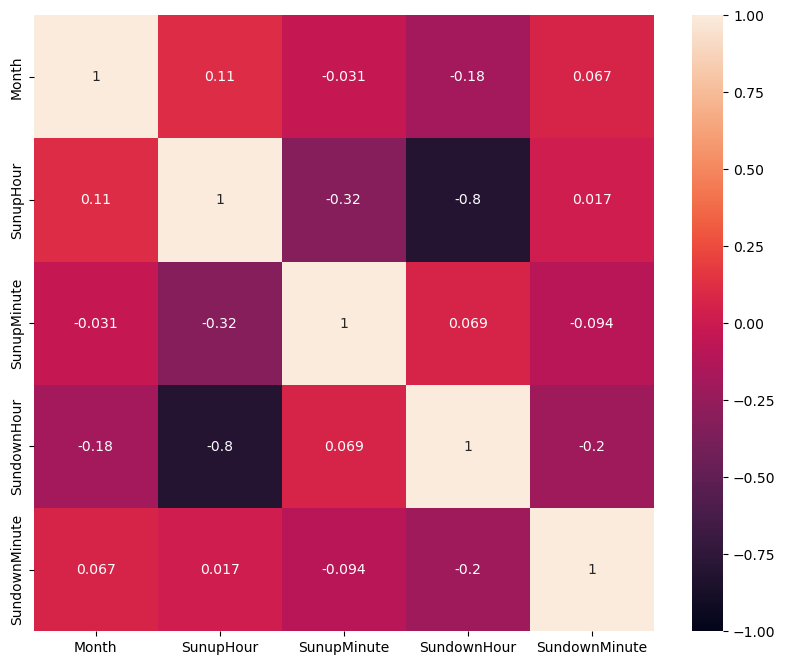

In [15]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap='rocket')
plt.show()

### Splitting and Scaling

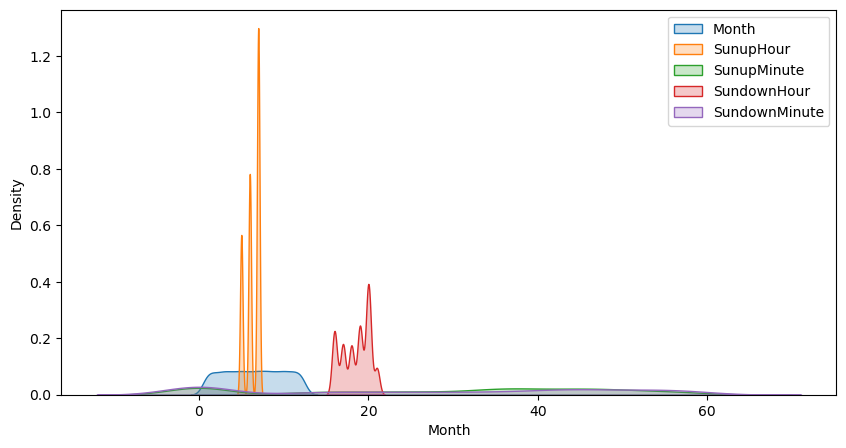

In [26]:
plt.figure(figsize=(10, 5))
for column in df.columns:
    sns.kdeplot(df[column], shade=True, label=column)
    plt.legend()
plt.show()

In [27]:
y = df['Month'].copy()
X = df.drop('Month', axis=1).copy()

In [28]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=122)

### Training

In [37]:
models = []
Cs = [0.01, 0.1, 1.0,  10.0, 100.0, 1000.0]

for C in Cs:
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    models.append(model)

In [38]:
models

[LogisticRegression(C=0.01),
 LogisticRegression(C=0.1),
 LogisticRegression(),
 LogisticRegression(C=10.0),
 LogisticRegression(C=100.0),
 LogisticRegression(C=1000.0)]

### Results

In [41]:
model_acc = [model.score(X_test, y_test) for model in models]

print(f"   Model Accuracy (C={Cs[0]}):", model_acc[0])
print(f"    Model Accuracy (C={Cs[1]}):", model_acc[1])
print(f"    Model Accuracy (C={Cs[2]}):", model_acc[2])
print(f"   Model Accuracy (C={Cs[3]}):", model_acc[3])
print(f"  Model Accuracy (C={Cs[4]}):", model_acc[4])
print(f" Model Accuracy (C={Cs[5]}):", model_acc[5])

   Model Accuracy (C=0.01): 0.48092868988391374
    Model Accuracy (C=0.1): 0.548922056384743
    Model Accuracy (C=1.0): 0.6683250414593698
   Model Accuracy (C=10.0): 0.7520729684908789
  Model Accuracy (C=100.0): 0.7893864013266998
 Model Accuracy (C=1000.0): 0.7893864013266998
